### Pregunta 1 - Extracción de datos de acciones de Tesla utilizando yfinance - 2 Puntos

In [ ]:
import yfinance as yf
import pandas as pd

# Crear el objeto Ticker para Tesla
tesla = yf.Ticker("TSLA")

# Extraer los datos históricos de Tesla
tesla_data = tesla.history(period="max")

# Restablecer el índice del DataFrame
tesla_data.reset_index(inplace=True)

# Mostrar las primeras cinco filas del DataFrame
print(tesla_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


### Pregunta 2 - Extracción de datos de ingresos de Tesla utilizando Webscraping - 1 Puntos

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from io import StringIO

# Realizar la solicitud HTTP a la página web
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'
response = requests.get(url)

# Analizar el contenido HTML usando BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Extraer la tabla de ingresos de Tesla
table = soup.find_all('table')[1]

# Convertir la cadena HTML en un objeto StringIO y luego utilizar pd.read_html()
table_string = StringIO(str(table))
tesla_revenue = pd.read_html(table_string)[0]
tesla_revenue.columns = ['Date', 'Revenue']

# Limpiar los datos
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace(',', '').str.replace('$', '')
tesla_revenue.dropna(inplace=True)

# Mostrar las últimas cinco filas del DataFrame
print(tesla_revenue.tail())



          Date Revenue
48  2010-09-30      31
49  2010-06-30      28
50  2010-03-31      21
52  2009-09-30      46
53  2009-06-30      27


### Pregunta 3 - Extracción de datos de acciones de GameStop utilizando yfinance - 2 Puntos

In [ ]:
import yfinance as yf
import pandas as pd

# Crear el objeto Ticker para GameStop
gamestop = yf.Ticker("GME")

# Extraer los datos históricos de GameStop
gme_data = gamestop.history(period="max")

# Restablecer el índice del DataFrame
gme_data.reset_index(inplace=True)

# Mostrar las primeras cinco filas del DataFrame
print(gme_data.head())


                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


### Pregunta 4 - Extracción de datos de ingresos de GameStop utilizando Webscraping - 1 Puntos


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from io import StringIO

# Realizar la solicitud HTTP a la página web
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'
response = requests.get(url)

# Analizar el contenido HTML usando BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Extraer la tabla de ingresos de GameStop
table = soup.find_all('table')[1]

# Convertir la tabla en un DataFrame utilizando pandas y StringIO para evitar el FutureWarning
table_string = StringIO(str(table))
gme_revenue = pd.read_html(table_string)[0]
gme_revenue.columns = ['Date', 'Revenue']

# Limpiar los datos
gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace(',', '').str.replace('$', '')
gme_revenue.dropna(inplace=True)

# Mostrar las últimas cinco filas del DataFrame
print(gme_revenue.tail())

          Date Revenue
57  2006-01-31    1667
58  2005-10-31     534
59  2005-07-31     416
60  2005-04-30     475
61  2005-01-31     709


### Pregunta 5 - Tablero de acciones e ingresos de Tesla - 2 Puntos


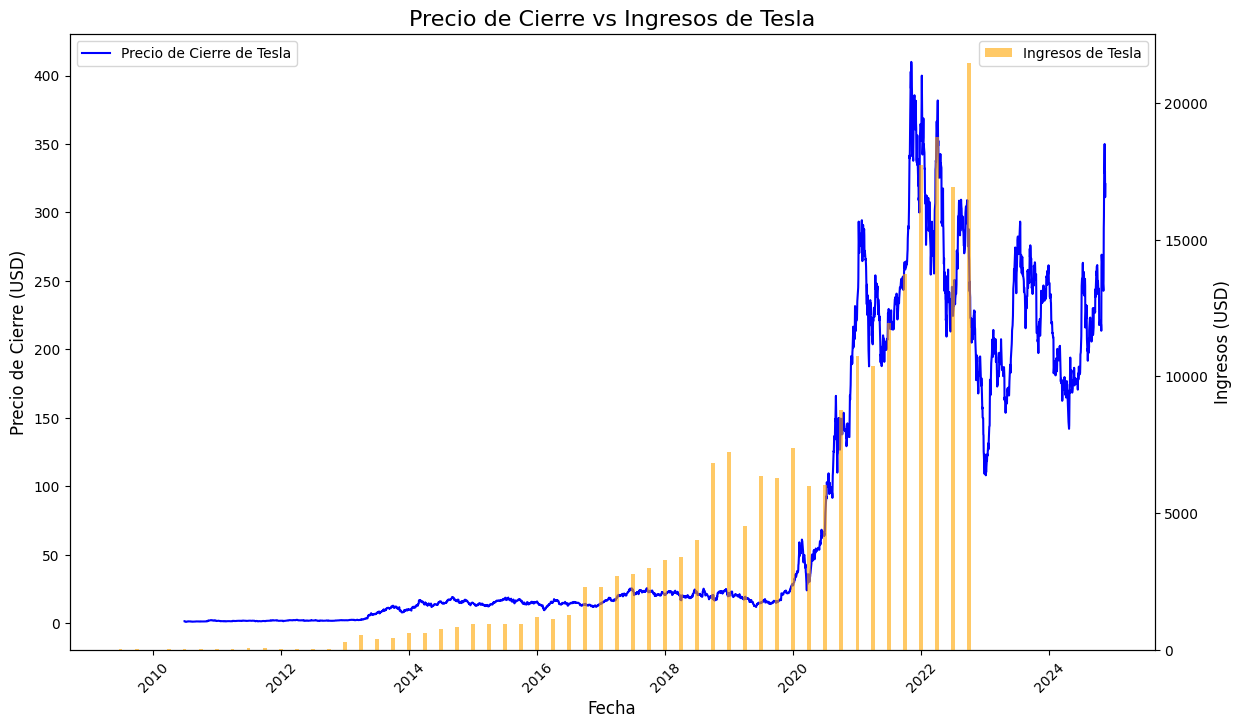

In [85]:
import yfinance as yf
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO

# Extraer los datos de acciones de Tesla utilizando yfinance
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)

# Convertir la columna 'Date' a formato datetime para facilitar la visualización
tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])

# Extraer los datos de ingresos de Tesla utilizando Web Scraping
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'
response = requests.get(url)

# Analizar el contenido HTML usando BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Extraer la tabla de ingresos de Tesla
table = soup.find_all('table')[1]
table_string = StringIO(str(table))
tesla_revenue = pd.read_html(table_string)[0]
tesla_revenue.columns = ['Date', 'Revenue']

# Limpiar los datos de ingresos
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace(r'[^0-9]', '', regex=True)
tesla_revenue.dropna(inplace=True)
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].astype('int64')

# Convertir la columna 'Date' a formato datetime para facilitar la visualización
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])

# Crear el gráfico combinado de precios de acciones e ingresos
fig, ax1 = plt.subplots(figsize=(14, 8))

# Graficar el precio de cierre de las acciones de Tesla usando Seaborn
sns.lineplot(data=tesla_data, x='Date', y='Close', ax=ax1, label='Precio de Cierre de Tesla', color='blue')
ax1.set_ylabel('Precio de Cierre (USD)', fontsize=12)
ax1.set_xlabel('Fecha', fontsize=12)
plt.xticks(rotation=45)

# Crear un segundo eje y para los ingresos de Tesla usando Matplotlib
# Aumentar el ancho de las barras para que sean más grandes
ax2 = ax1.twinx()
ax2.bar(tesla_revenue['Date'], tesla_revenue['Revenue'], alpha=0.6, color='orange', label='Ingresos de Tesla', width=20)
ax2.set_ylabel('Ingresos (USD)', fontsize=12)

# Configurar el título del gráfico
plt.title('Precio de Cierre vs Ingresos de Tesla', fontsize=16)

# Añadir leyendas para ambos gráficos
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Mostrar el gráfico
plt.show()


### Pregunta 6 - Cuadro de mando de acciones e ingresos de GameStop - 2 Puntos

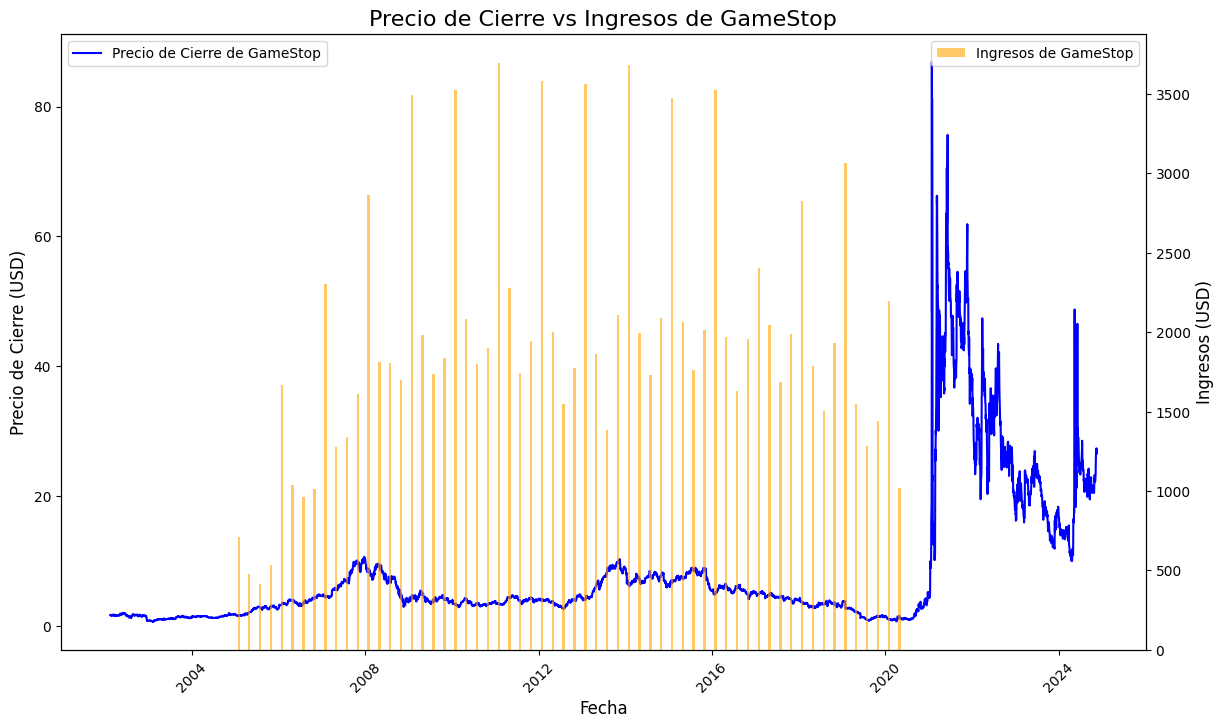

In [87]:
import yfinance as yf
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO

# Extraer los datos de acciones de GameStop utilizando yfinance
gamestop = yf.Ticker("GME")
gamestop_data = gamestop.history(period="max")
gamestop_data.reset_index(inplace=True)

# Convertir la columna 'Date' a formato datetime para facilitar la visualización
gamestop_data['Date'] = pd.to_datetime(gamestop_data['Date'])

# Extraer los datos de ingresos de GameStop utilizando Web Scraping
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'
response = requests.get(url)

# Analizar el contenido HTML usando BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Extraer la tabla de ingresos de GameStop
table = soup.find_all('table')[1]
table_string = StringIO(str(table))
gamestop_revenue = pd.read_html(table_string)[0]
gamestop_revenue.columns = ['Date', 'Revenue']

# Limpiar los datos de ingresos
gamestop_revenue['Revenue'] = gamestop_revenue['Revenue'].str.replace(r'[^0-9]', '', regex=True)
gamestop_revenue.dropna(inplace=True)
gamestop_revenue['Revenue'] = gamestop_revenue['Revenue'].astype('int64')

# Convertir la columna 'Date' a formato datetime para facilitar la visualización
gamestop_revenue['Date'] = pd.to_datetime(gamestop_revenue['Date'])

# Crear el gráfico combinado de precios de acciones e ingresos
fig, ax1 = plt.subplots(figsize=(14, 8))

# Graficar el precio de cierre de las acciones de GameStop usando Seaborn
sns.lineplot(data=gamestop_data, x='Date', y='Close', ax=ax1, label='Precio de Cierre de GameStop', color='blue')
ax1.set_ylabel('Precio de Cierre (USD)', fontsize=12)
ax1.set_xlabel('Fecha', fontsize=12)
plt.xticks(rotation=45)

# Crear un segundo eje y para los ingresos de GameStop usando Matplotlib
ax2 = ax1.twinx()
ax2.bar(gamestop_revenue['Date'], gamestop_revenue['Revenue'], alpha=0.6, color='orange', label='Ingresos de GameStop', width=20)
ax2.set_ylabel('Ingresos (USD)', fontsize=12)

# Configurar el título del gráfico
plt.title('Precio de Cierre vs Ingresos de GameStop', fontsize=16)

# Añadir leyendas para ambos gráficos
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Mostrar el gráfico
plt.show()

